# **Car Buyer Prediction using Social Network Ads**

This dataset contains information of users in a social network. Those informations are the user id, the gender, the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

In this problem statement, we are applying Random Forest Classifier algorithm to the dataset.

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np

# Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

# Data cleaning

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

Changing the datatype of Gender from string to int by doing label encoding.

In [7]:
df = df.drop('User ID', axis = 1)

User ID is unique for each record, so it is not important for data analysis.

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [9]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df = df.drop_duplicates()
df.shape

(380, 4)

We have dropped all the duplicates.

In [11]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000,380.000000
mean,0.478947,37.586842,70421.052632,0.368421
std,0.500215,10.592492,34604.155483,0.483012
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.000000,43000.000000,0.000000
50%,0.000000,37.000000,70500.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [12]:
# Age
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 17.0
Upper Threshold : 71.5
Lower Threshold : 3.5


In [13]:
# Estimated Salary
iqr = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['EstimatedSalary'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['EstimatedSalary'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 45000.0
Upper Threshold : 155500.0
Lower Threshold : -24500.0


There are no outliers in the data and the data is cleaned and ready for preprocessing.

# Data preparation

In [14]:
X = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Split the data into train and test.


*   Training - 70%
*   Testing - 30%



In [16]:
X_train.shape, X_test.shape

((266, 3), (114, 3))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaled the data using Standard Scaler.

# Model training

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt')

# Prediction

In [19]:
y_pred = rf.predict(X_test_scaled)

In [20]:
compare = pd.DataFrame({'Original':y_test, 'Predicted':y_pred})
compare.head(10)

,Original,Predicted
84,0,0
294,0,0
133,0,0
203,0,0
120,0,0
325,0,0
56,0,0
193,0,0
89,0,0
82,0,0


# Evaluation metric

In [21]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, plot_roc_curve, roc_auc_score
print('Accuracy Score :', accuracy_score(y_test,y_pred))
print('F1 Score :', f1_score(y_test,y_pred))

Accuracy Score : 0.9210526315789473
F1 Score : 0.8767123287671232


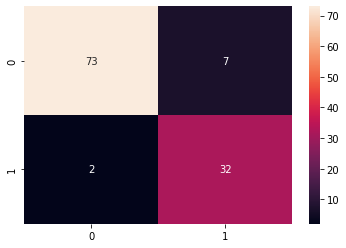

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot =  True)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


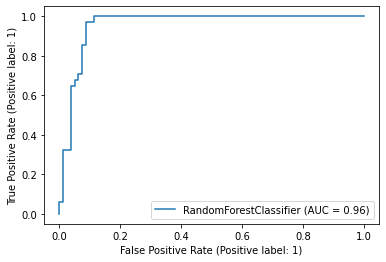

In [23]:
plot_roc_curve(rf,X_test_scaled,y_test)
plt.show()

In [24]:
print('AUROC Score :', roc_auc_score(y_test,y_pred))

AUROC Score : 0.9268382352941176


As this model gives 0.93 as AUROC score, we can conclude that it is a very good model to predict the buyer of the SUV with 93% accuracy.



# Feature Importance

In [25]:
importance = rf.feature_importances_
list(zip(importance,X_test.columns))

[(0.009418573814853887, 'Gender'),
 (0.5720996242702112, 'Age'),
 (0.418481801914935, 'EstimatedSalary')]

Here, we have found the importance of each feature. Age and Estimated Salary are the most important features in buying a SUV.

# Visualisation of tree

In [26]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[16]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_rf.dot', feature_names = X_train.columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_rf.dot')

# Write graph to a png file
graph.write_png('tree_rf.png')